# ASSIGNMENT BUILDING & CREATING ISSUES FOR STUDENTS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Read the CSV file
sales_df = pd.read_csv("Sales_Data.csv")

customer_df = pd.read_csv("Customer_Info.csv")




<hr>

# Working with the Sales Data

## 01 Data Ingestion, Initial EDA and Cleaning

In [4]:

# 5 points
#   Read the csv Sales_Data.csv creating a dataframe called "sales_df"
sales_df = pd.read_csv("Sales_Data.csv")

#   Use the parse_dates argument to parse any datetime columns
sales_df = pd.read_csv('sales_data.csv', parse_dates=['Order_Date'])

# Convert the "Order_Date" column to a datetime type
sales_df['Order_Date'] = pd.to_datetime(sales_df['Order_Date'])

# Converting the column headers to uppercase using list comprehension
sales_df.columns = [col.upper() for col in sales_df.columns]

# Printing the shape of the Sales_Data dataframe
print("Shape of the Sales_Data dataframe:", sales_df.shape)
#   Show the first 3 rows of the dataframe
print(sales_df.head(3))







Shape of the Sales_Data dataframe: (2841, 14)
   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10107 2018-02-24                 2           108.000     300.240   
1         10329 2019-11-15                 1           139.000     300.240   
2         10107 2018-02-24                 5           120.000     286.120   

      SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 22947.880  Shipped          Poultry         1     S10_1678     Small   
1 29545.290  Shipped          Poultry         1     S10_1678    Medium   
2 22067.150  Shipped          Poultry         1     S10_2016    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
0        COSTCO        81313          Active  
1        COSTCO        81313          Active  
2        COSTCO        81313          Active  


In [5]:
# In this cell, run duplicated() and any() to determine if the dataframe (sales_df) has any duplicates in sales_df
# 1 point
# check for duplicates in sales_df
duplicates_exist = sales_df.duplicated().any()

# print the result
print(duplicates_exist)


True


In [6]:
# In this cell, run duplicated() and sum() to report the number of duplicates in sales_df
# 1 point
# count the number of duplicates in sales_df

num_duplicates = sales_df.duplicated().sum()

# print the result
print(num_duplicates)


5


In [7]:

# 4 points

# print the shape of sales_df
print("Shape of original dataframe: ", sales_df.shape)

# drop duplicates in place
sales_df.drop_duplicates(inplace=True)

# print the new shape of the dataframe
print("Shape of deduplicated dataframe: ", sales_df.shape)



Shape of original dataframe:  (2841, 14)
Shape of deduplicated dataframe:  (2836, 14)


In [8]:
# In this cell, overwrite the current sales_df by sorting the dataset by Order Date and Line Item Number
# Reset the index setting the drop argument to True 
# Show the head of the dataframe
# 6 points

sales_df.sort_values(by=['ORDER_DATE','LINE_ITEM_NUMBER'],inplace=True)


# reset the index
sales_df.reset_index(drop=True, inplace=True)

# show the head of the dataframe
print(sales_df.head())



   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100 2018-01-06                 1           140.000     244.290   
1         10100 2018-01-06                 2           134.000     285.490   
2         10100 2018-01-06                 3           124.000     308.060   
3         10100 2018-01-06                 4           145.000     313.270   
4         10101 2018-01-09                 1           109.000     337.600   

      SALES   STATUS      PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 16881.290  Shipped  Fresh Produce Fruits         1     S24_3969     Small   
1 22631.610  Shipped  Fresh Produce Fruits         1     S18_2248    Medium   
2 25638.610  Shipped  Fresh Produce Fruits         1     S18_1749    Medium   
3 28396.380  Shipped  Fresh Produce Fruits         1     S18_4409     Small   
4 23357.820  Shipped  Fresh Produce Fruits         1     S18_2795    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
0       W

In [9]:
# In this cell, output the data types of sales_df using info()
# 1 point
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER_NUMBER      2836 non-null   int64         
 1   ORDER_DATE        2836 non-null   datetime64[ns]
 2   LINE_ITEM_NUMBER  2836 non-null   int64         
 3   QUANTITY_ORDERED  2833 non-null   float64       
 4   PRICE_EACH        2833 non-null   float64       
 5   SALES             2833 non-null   float64       
 6   STATUS            2836 non-null   object        
 7   PRODUCT_CATEGORY  2833 non-null   object        
 8   HAS_MSRP          2836 non-null   int64         
 9   PRODUCT_CODE      2833 non-null   object        
 10  DEAL_SIZE         2836 non-null   object        
 11  CUSTOMER_NAME     2836 non-null   object        
 12  CUSTOMER_ID       2836 non-null   int64         
 13  CUSTOMER_STATUS   2836 non-null   object        
dtypes: datetime64[ns](1), fl

In [10]:
# In this cell, show the output on sales_df of describe()
# 1 point

sales_df.describe()

,ORDER_NUMBER,LINE_ITEM_NUMBER,QUANTITY_ORDERED,PRICE_EACH,SALES,HAS_MSRP,CUSTOMER_ID
count,2836.000,2836.000,2833.000,2833.000,2833.000,2836.000,2836.000
mean,10258.587,348262.580,135.147,638.278,24896.979,1.000,68032.389
std,92.045,18546068.180,17.238,18782.479,4632.037,0.000,20686.774
min,10100.000,1.000,86.000,207.000,12366.600,1.000,32332.000
25%,10180.000,3.000,123.000,262.070,21698.520,1.000,38396.000
50%,10262.000,6.000,135.000,287.440,24733.700,1.000,79895.000
75%,10333.000,9.000,148.000,311.110,28040.970,1.000,82219.000
max,10425.000,987654321.000,218.000,999999.000,43910.080,1.000,87731.000


## 02 Additional EDA and Data Cleaning

In [11]:
# In this cell, filter the dataframe to the max value for Price Each identified in the output of describe() above
# 2 pointsmax_price_each = sales_df['PRICE_EACH'].max()
max_price_each = sales_df['PRICE_EACH'].max()
filtered_df = sales_df[sales_df['PRICE_EACH'] == max_price_each]
print(filtered_df)





      ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
2143         10334 2019-11-19                 4           145.000  999999.000   

         SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
2143 32142.270  Shipped             Pork         1     S18_4600    Medium   

     CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
2143       WALMART        38396          Active  


In [12]:
# In this cell, filter the dataframe to the max value for Line Item Number identified in the output of describe() above
# 1 point

max_item_number = sales_df['LINE_ITEM_NUMBER'].max()
print(sales_df[sales_df['LINE_ITEM_NUMBER'] == max_item_number])



      ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
1644         10283 2019-08-20         987654321           119.000     253.180   

         SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
1644 20398.390  Shipped            Dairy         1     S18_3029     Small   

     CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
1644       WALMART        79895          Active  


In [13]:
# In this cell, filter the dataframe to the Order Number identified in the output above
# Sort values by Line Item Number
# Show the head of the first 30 rows
# 3 points

temp1=sales_df[sales_df['ORDER_NUMBER'] == 10283]
print(temp1)
temp2=temp1.sort_values(by=['LINE_ITEM_NUMBER'])
temp2.head(30)

      ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
1618         10283 2019-08-20                 1           161.000     278.680   
1620         10283 2019-08-20                 2           106.000     261.460   
1622         10283 2019-08-20                 3           155.000     301.530   
1625         10283 2019-08-20                 5           126.000     318.650   
1627         10283 2019-08-20                 6           112.000     310.790   
1629         10283 2019-08-20                 7           156.000     251.110   
1631         10283 2019-08-20                 8           155.000     299.080   
1633         10283 2019-08-20                 9           168.000     247.130   
1635         10283 2019-08-20                10           142.000     262.690   
1637         10283 2019-08-20                11           160.000     292.050   
1639         10283 2019-08-20                12           123.000     240.650   
1641         10283 2019-08-2

,ORDER_NUMBER,ORDER_DATE,LINE_ITEM_NUMBER,QUANTITY_ORDERED,PRICE_EACH,SALES,STATUS,PRODUCT_CATEGORY,HAS_MSRP,PRODUCT_CODE,DEAL_SIZE,CUSTOMER_NAME,CUSTOMER_ID,CUSTOMER_STATUS
1618,10283,2019-08-20,1,161.000,278.680,26192.010,Shipped,Beef,1,S72_1253,Small,WALMART,79895,Active
1620,10283,2019-08-20,2,106.000,261.460,18274.440,Shipped,Dairy,1,S700_2047,Small,WALMART,79895,Active
1622,10283,2019-08-20,3,155.000,301.530,29755.460,Shipped,Fresh Produce Fruits,1,S18_3856,Medium,WALMART,79895,Active
1625,10283,2019-08-20,5,126.000,318.650,25129.330,Shipped,Fresh Produce Fruits,1,S24_3816,Small,WALMART,79895,Active
1627,10283,2019-08-20,6,112.000,310.790,23959.480,Shipped,Fresh Produce Vegetables,1,S10_4757,Small,WALMART,79895,Active
1629,10283,2019-08-20,7,156.000,251.110,25871.090,Shipped,Dairy,1,S700_2610,Medium,WALMART,79895,Active
1631,10283,2019-08-20,8,155.000,299.080,31195.410,Shipped,Fresh Produce Fruits,1,S24_3151,Medium,WALMART,79895,Active
1633,10283,2019-08-20,9,168.000,247.130,24649.830,Shipped,Dairy,1,S700_1138,Medium,WALMART,79895,Active
1635,10283,2019-08-20,10,142.000,262.690,25414.650,Shipped,Dairy,1,S700_3505,Small,WALMART,79895,Active
1637,10283,2019-08-20,11,160.000,292.050,33403.700,Shipped,Dairy,1,S700_3962,Medium,WALMART,79895,Active


In [14]:
# In this cell:
#  Filter the dataframe to the Order Number identified in the output above and where the Line Item Number is equal to 987654321
# 3 points


temp3=sales_df[(sales_df['LINE_ITEM_NUMBER'] == 987654321)&(sales_df['ORDER_NUMBER'] == 10283)]

print(temp3)







      ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
1644         10283 2019-08-20         987654321           119.000     253.180   

         SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
1644 20398.390  Shipped            Dairy         1     S18_3029     Small   

     CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
1644       WALMART        79895          Active  


In [15]:
# In this cell, check for missing values using isnull() and sum()
# 1 points
# Check for missing values using isnull() and sum()
sales_df.isnull().sum()




ORDER_NUMBER        0
ORDER_DATE          0
LINE_ITEM_NUMBER    0
QUANTITY_ORDERED    3
PRICE_EACH          3
SALES               3
STATUS              0
PRODUCT_CATEGORY    3
HAS_MSRP            0
PRODUCT_CODE        3
DEAL_SIZE           0
CUSTOMER_NAME       0
CUSTOMER_ID         0
CUSTOMER_STATUS     0
dtype: int64

In [16]:
# In this cell, drop all rows with missing values using dropna()
# Set the axis to 0
# Overwrite sales_df using inplace=True
# Again, check for missing values using isnull() and sum() to confirm your changes
# 2 points
sales_df.dropna(axis=0, inplace=True)
print(sales_df.isnull().sum())


ORDER_NUMBER        0
ORDER_DATE          0
LINE_ITEM_NUMBER    0
QUANTITY_ORDERED    0
PRICE_EACH          0
SALES               0
STATUS              0
PRODUCT_CATEGORY    0
HAS_MSRP            0
PRODUCT_CODE        0
DEAL_SIZE           0
CUSTOMER_NAME       0
CUSTOMER_ID         0
CUSTOMER_STATUS     0
dtype: int64


<AxesSubplot:xlabel='SALES'>

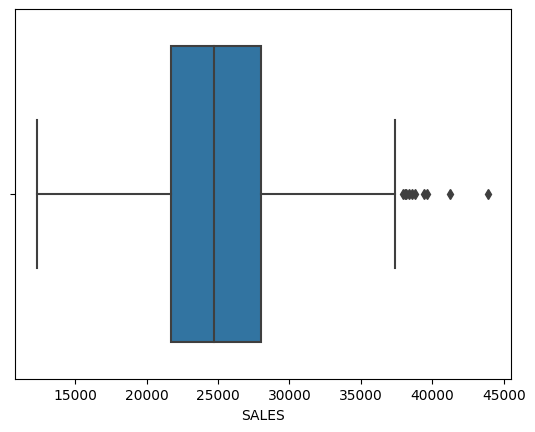

In [26]:
# In this cell, create a box plot with Seaborn for the Sales column in sales_df
# 1 point


sns.boxplot(x=sales_df['SALES'])


In [34]:
sales_df2 = sales_df.copy()

<hr>

# Working with the Customer Info Data

## 01 Data Ingestion, Initial EDA and Cleaning

In [35]:
# In this cell, complete the following:
#   Read the csv Customer_Info.csv creating a dataframe called "customer_df"
#   Use str and upper() to convert the column headers to uppercase
#   Print the shape of the dataframe
#   Show the first 3 rows of the dataframe
# 4 points

# 5 points

customer_df = pd.read_csv("Customer_Info.csv")
customer_df.columns=customer_df.columns.str.upper()
print(customer_df.shape)
print(customer_df.head(3))









(45, 8)
   CUSTOMER_ID               CUSTOMER_ADDRESS  CUSTOMER_POSTAL_CODE  \
0        81313        897 Long Airport Avenue                 73301   
1        36763             59 rue de l'Abbaye                 30033   
2        35419  27 rue du Colonel Pierre Avia                 33480   

  CUSTOMER_CITY CUSTOMER_STATE CUSTOMER_COUNTRY      CONTACT_NAME  \
0        Austin             TX              USA          Yu, Kwai   
1       Atlanta             GA              USA     Henriot, Paul   
2    Palm Beach             FL              USA  Da Cunha, Daniel   

  CONTACT_PHONE  
0  +10740359934  
1  759-472-0266  
2  +17238100489  


In [36]:
# In this cell, run duplicated() and any() to determine if the dataframe (customer_df) has any duplicates
# 1 point

duplicates_exist = customer_df.duplicated().any()

# print the result
print(duplicates_exist)


True


In [37]:
# In this cell, run duplicated() and sum() to report the number of duplicates in customer_df
# 1 point


num_duplicates = customer_df.duplicated().sum()

# print the result
print(num_duplicates)


3


In [38]:
# In this cell, print the shape of customer_df
# Drop duplicates in place using drop_duplicates()
# Print the new shape of the dataframe
# 4 points

# 4 points

print("Shape of original dataframe: ", customer_df.shape)

customer_df.drop_duplicates(inplace=True)

print("Shape of deduplicated dataframe: ", customer_df.shape)



Shape of original dataframe:  (45, 8)
Shape of deduplicated dataframe:  (42, 8)


In [39]:
# In this cell, output the data types of customer_df using info()
# 1 point

customer_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CUSTOMER_ID           42 non-null     int64 
 1   CUSTOMER_ADDRESS      42 non-null     object
 2   CUSTOMER_POSTAL_CODE  42 non-null     int64 
 3   CUSTOMER_CITY         42 non-null     object
 4   CUSTOMER_STATE        42 non-null     object
 5   CUSTOMER_COUNTRY      42 non-null     object
 6   CONTACT_NAME          42 non-null     object
 7   CONTACT_PHONE         42 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


## 02 Additional EDA and Data Cleaning

In [40]:
# In this cell, check for missing values using isnull() and sum() in customer_df
# 1 point
customer_df.isnull().sum()





CUSTOMER_ID             0
CUSTOMER_ADDRESS        0
CUSTOMER_POSTAL_CODE    0
CUSTOMER_CITY           0
CUSTOMER_STATE          0
CUSTOMER_COUNTRY        0
CONTACT_NAME            0
CONTACT_PHONE           0
dtype: int64

## 04 Additional Data Work

In [41]:
# In this cell, merge sales_df2 and customer_df
# The left dataframe will be sales_df2 and the right dataframe will be customer_df
# Create a new dataframe as the result from the merge called sales_customer_df
# Use merge() with a "left" join on the key of customer ID
# Print the shape of sales_df2 and sales_customer_df after the merge
# Print the head of sales_customer_df
# 7 points
sales_customer_df=pd.merge(sales_df2,customer_df,on='CUSTOMER_ID',how='left')

print(sales_customer_df.shape)

print(sales_customer_df.head())

(2833, 21)
   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100 2018-01-06                 1           140.000     244.290   
1         10100 2018-01-06                 2           134.000     285.490   
2         10100 2018-01-06                 3           124.000     308.060   
3         10100 2018-01-06                 4           145.000     313.270   
4         10101 2018-01-09                 1           109.000     337.600   

      SALES   STATUS      PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 16881.290  Shipped  Fresh Produce Fruits         1     S24_3969     Small   
1 22631.610  Shipped  Fresh Produce Fruits         1     S18_2248    Medium   
2 25638.610  Shipped  Fresh Produce Fruits         1     S18_1749    Medium   
3 28396.380  Shipped  Fresh Produce Fruits         1     S18_4409     Small   
4 23357.820  Shipped  Fresh Produce Fruits         1     S18_2795    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS 

In [42]:
# In this cell, extract the month and day from Order Date, creating a new column for each in sales_customer_df
# Use dt Create a month column called ORDER_MONTH using dt.month
# Create a year column called ORDER_YEAR using dt.year
# Print the first 3 rows of sales_customer_df
# 5 points


sales_customer_df['ORDER_MONTH'] = sales_customer_df['ORDER_DATE'].dt.month
sales_customer_df['ORDER_YEAR'] = sales_customer_df['ORDER_DATE'].dt.year

print(sales_customer_df.head(3))






   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100 2018-01-06                 1           140.000     244.290   
1         10100 2018-01-06                 2           134.000     285.490   
2         10100 2018-01-06                 3           124.000     308.060   

      SALES   STATUS      PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 16881.290  Shipped  Fresh Produce Fruits         1     S24_3969     Small   
1 22631.610  Shipped  Fresh Produce Fruits         1     S18_2248    Medium   
2 25638.610  Shipped  Fresh Produce Fruits         1     S18_1749    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS   CUSTOMER_ADDRESS  \
0       WALMART        82219          Active  9408 Furth Circle   
1       WALMART        82219          Active  9408 Furth Circle   
2       WALMART        82219          Active  9408 Furth Circle   

   CUSTOMER_POSTAL_CODE CUSTOMER_CITY CUSTOMER_STATE CUSTOMER_COUNTRY  \
0                 77001     

In [43]:
# In this cell, you will create a dataframe of the total sales by product category
# Create a new dataframe called "product_sales"
# Groupby PRODUCT CATEGORY
# Set as_index to False
# Aggregate by SALES taking the sum
# Print the dataframe product_sales
# 6 points

product_sales=sales_customer_df.groupby('PRODUCT_CATEGORY',as_index=False).aggregate({'SALES':'sum'})

print(product_sales)

           PRODUCT_CATEGORY        SALES
0                      Beef  7445917.170
1                     Bread  1711599.050
2                     Dairy  5560481.190
3      Fresh Produce Fruits 14803237.690
4  Fresh Produce Vegetables 24461782.140
5                      Pork  8063516.060
6                   Poultry  8486607.940


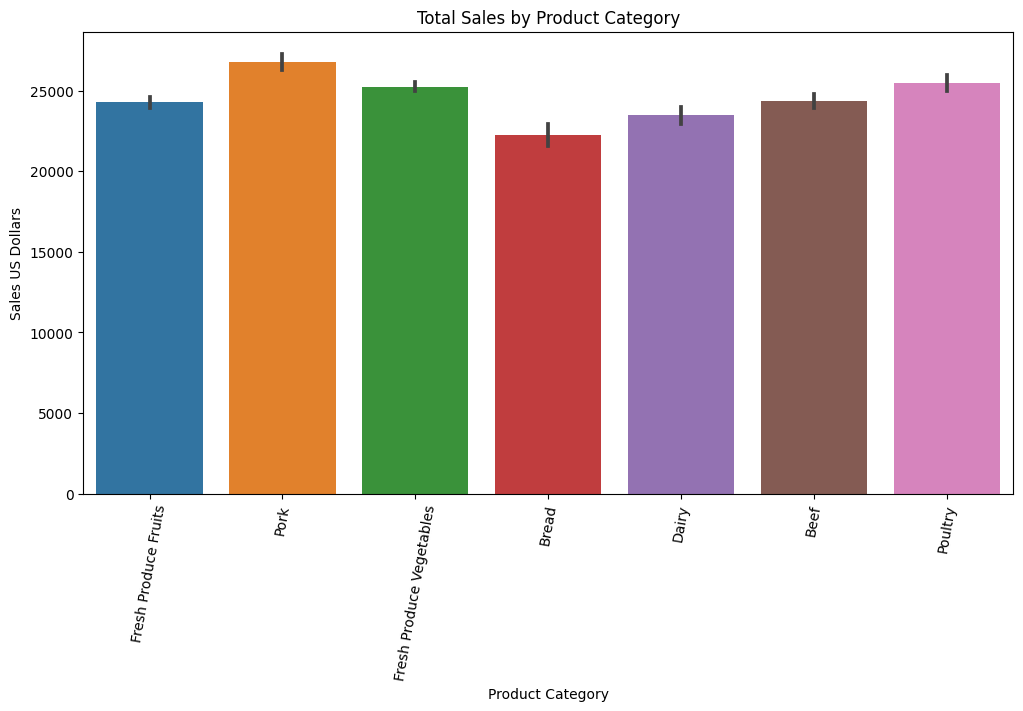

In [44]:
# In this cell, visualize the data created above
# Using seaborn, create a barplot
# Set x to PRODUCT CATEGORY
# Set y to SALES
# Title the graph "Total Sales by Product Category"
# Set xticks to a rotation of 80
# Set the ylabel to "Sales US Dollars"
# 7 points

plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCT_CATEGORY', y='SALES', data=sales_customer_df)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation=80)
plt.ylabel('Sales US Dollars')
plt.show()




